### Home Credit Default Risk — Predicting Loan Default
**Student:** Kush Sharma 

**Module:** UFCEP1-30-M - Machine learning algorithms 

**Date:** 11 December 2025 

**Statement:** I confirm that this submission is my own work and follows the departmental guidance.

This project uses the Home Credit Default Risk dataset from the UCI Machine Learning Repository and the Kaggle competition (Lichman, 2013; Kaggle, 2018). The dataset includes 307,511 loan applications with 122 features describing demographic, financial, and behavioural information. The goal is to predict the TARGET variable, indicating loan repayment or default. This binary classification task is widely used in credit scoring and risk management within the financial industry.

### Initial Data Inspection

To understand the dataset structure and data quality, the following steps were taken:

Displaying the first few rows using the head() function.

Inspecting dataset dimensions (rows and columns).

Listing feature names to understand variable composition.

Using the info() function to examine data types and memory usage.

These steps provide a baseline understanding of the dataset necessary for subsequent cleaning, transformation, and modelling.

In [2]:
import pandas as pd

#Loading the dataset
data = pd.read_csv("application_train.csv")
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Check the first 5 rows
data.head()

# Check dataset shape (rows, columns)
print(data.shape)#(307511,122)how big the dataset is.

# Check column names
print(data.columns)#(Index(['.....'])) This lists all the 122 features.

# Check data types
print(data.info())#<<class 'pandas.core.frame.DataFrame'> RangeIndex: 307511 entries, 0 to 307510 Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR dtypes: float64(65), int64(41), object(16) memory usage: 286.2+ MB
#This reveals integers, floats, missing values and memory usage.

(307511, 122)
Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


In [5]:
# Count of missing values per column
missing_values = data.isnull().sum().sort_values(ascending=False) #data.isnull() checks every cell and marks whether it is NaN(missing),.sum() counts how many missing values are in each column,".sort_values" the values from the most missing to the least missing.
print(missing_values[missing_values > 0]) # Only prints the column that actually have missing values.

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
EXT_SOURCE_2                   660
AMT_GOODS_PRICE                278
AMT_ANNUITY                     12
CNT_FAM_MEMBERS                  2
DAYS_LAST_PHONE_CHANGE           1
Length: 67, dtype: int64


### Missing Value Inspection

The Home Credit dataset contains a lot of missing values. Out of the 122 features, 67 of them have at least one missing value. Some features have more than 60% missing values, most of them concerning some property and living circumstances, rendering these features less useful for modelling without sophisticated imputation. Some other features, like AMTANNUITY and CNTFAM_MEMBERS, have a lot less missing values and would be more appropriate for straightforward imputation techniques, such as the use of median replacement. Missing data should be critically assessed, as incorrect treatment can cause bias and lead to the development of a model that is less effective and produces predictions that are not valid, or even equitable. 

### Target Variable Distribution

The distribution of the TARGET variable indicates a substantial class imbalance. The majority class (0) represents customers who fully repaid their loans, whereas the minority class (1) represents customers who defaulted. Around eight per cent of applicants in the dataset belong to the positive (default) class.

This imbalance has important implications for model training. Accuracy alone is not an appropriate metric because a model predicting all observations as the majority class could achieve high accuracy while failing to identify default cases.

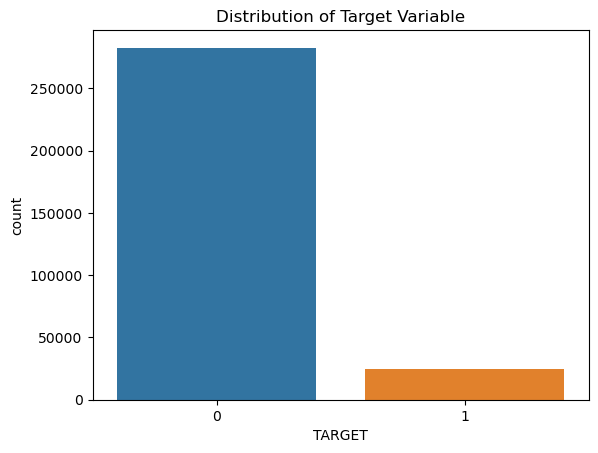

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='TARGET', data=data)
plt.title("Distribution of Target Variable")
plt.show()


In [7]:
from sklearn.model_selection import train_test_split

# Target and ID separation
TARGET = "TARGET" #What we're predicting ( loan default risk)
ID_COL = "SK_ID_CURR" #Unique ID for customers

y = data[TARGET]#Holds the TARGET(actual) value 0 or 1.
X = data.drop([TARGET, ID_COL], axis=1) #X holds the input features except TARGET, SK_ID_CURR(ID is not predctive and would mislead model)

# Stratified split (70% train, 15% validation, 15% testing)
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)
#15% of the data is kept aside as test set and never touched until the end, random_state=42 ensures reproducibility(same split every time), straitfy=y Keeps the class imbalance consistent across splits.

# Validation Split from Training Portion
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.1764706, random_state=42, stratify=y_trainval
)
#Why 0.1764706 because we took 15% of test set, leaving 85% now we want 15% validation from total dataset so 0.15/0.85=0.1764706.
#So, it splits the 70% train total to 15% Validation and 15% total to Test.
print("Train:", X_train.shape, "Validation:", X_val.shape, "Test:", X_test.shape)

Train: (215257, 120) Validation: (46127, 120) Test: (46127, 120)


### Train, Validation and Test Split

In order to have dependable model construction, the data was separated into training, validation, and testing subgroups. Being as how the variable of interest is extremely unbalanced, a stratified division was utilized in order to maintain the scale of cases of default and non default between the various sets. This stops biased learning and enables just evaluation. The division gave 70% for training, 15% for validation, and 15% for testing purposes. Training data was utilized to set the models, validation data assisted in tuning and model selection, and the test set was kept completely unaltered in order to offer a fair measures of performance on new, unseen applicants.

## Numerical feature exploration

Basic exploratory analysis is performed on selected numerical features to understand their distributions. This helps identify skew, outliers and potential need for transformations such as scaling or logarithmic conversion.


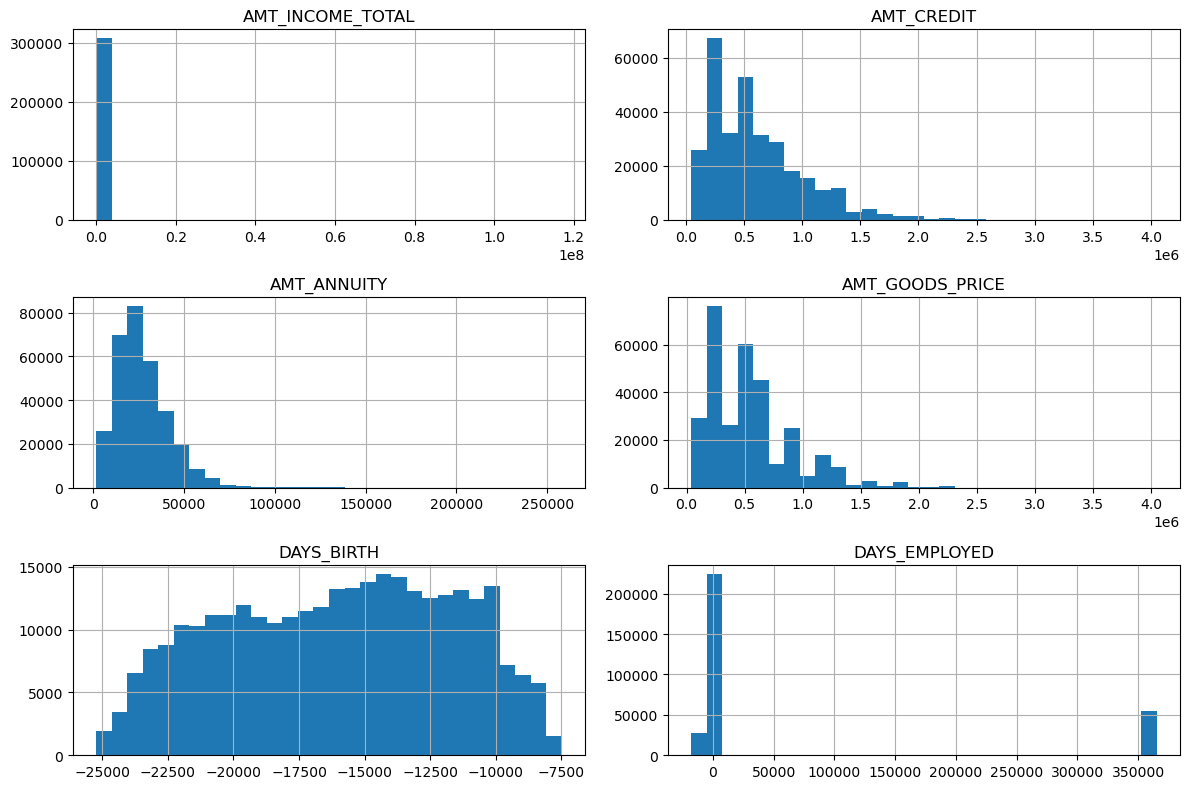

In [8]:
import matplotlib.pyplot as plt

num_cols = ["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY",
            "AMT_GOODS_PRICE", "DAYS_BIRTH", "DAYS_EMPLOYED"]
#No training is done here, simply inspecting how the dataset behaves.

num_cols = [c for c in num_cols if c in data.columns]

data[num_cols].hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()


### Numerical Feature Distribution

The histograms show the distributions of key numerical variables such as income, credit amount, annuity, goods price, age (DAYS_BIRTH) and employment length (DAYS_EMPLOYED). Most financial features (AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE) display a right-skewed pattern, where values cluster toward the lower end part of the x-axis. This indicates that most applicants have relatively modest income and credit levels, while only a small proportion have extremely high amounts.

DAYS_BIRTH spans a negative range because it represents age in days before the application date. DAYS_EMPLOYED shows a clear spike around the placeholder value 365243, highlighting an anomaly that requires correction during preprocessing.

These plots help identify skewness, outliers, and irregular values that influence later decisions about scaling, transformation, and data cleaning.

## Categorical feature exploration

Selected categorical features are visualised to understand their frequency distributions. This supports later feature encoding decisions.


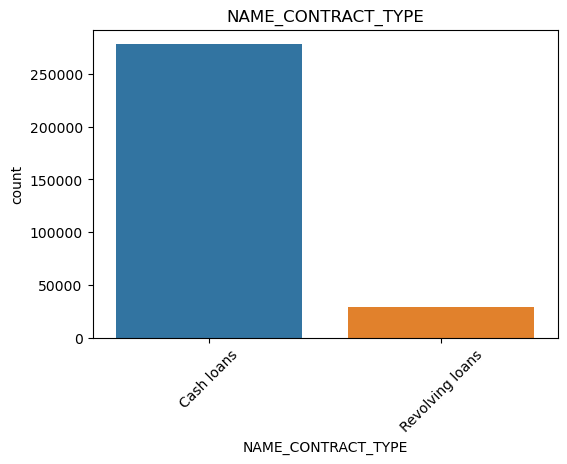

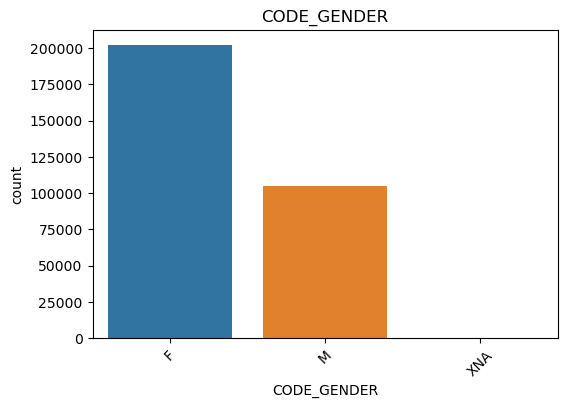

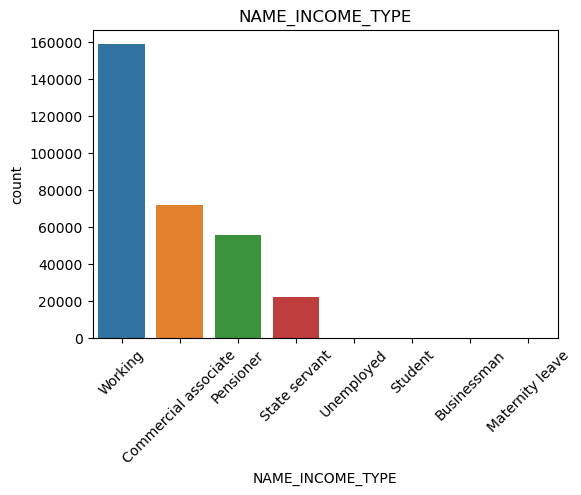

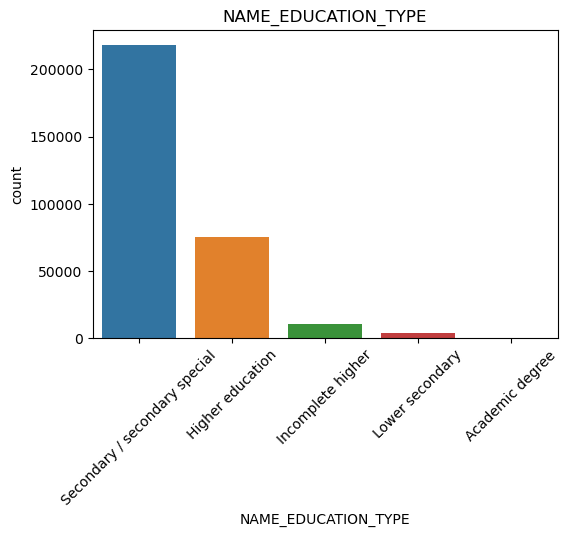

In [9]:
import seaborn as sns
cat_cols = ["NAME_CONTRACT_TYPE", "CODE_GENDER",
            "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE"]

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=data, order=data[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(col)
    plt.show()


## Correlation analysis of numerical features

Correlation analysis was conducted to identify multicollinearity among numerical features, which can negatively affect models such as Logistic Regression. A correlation matrix and heatmap highlighted redundant variables and those more related to the target. Although correlation does not imply causation, it supports informed feature selection (Hastie, Tibshirani and Friedman, 2009).


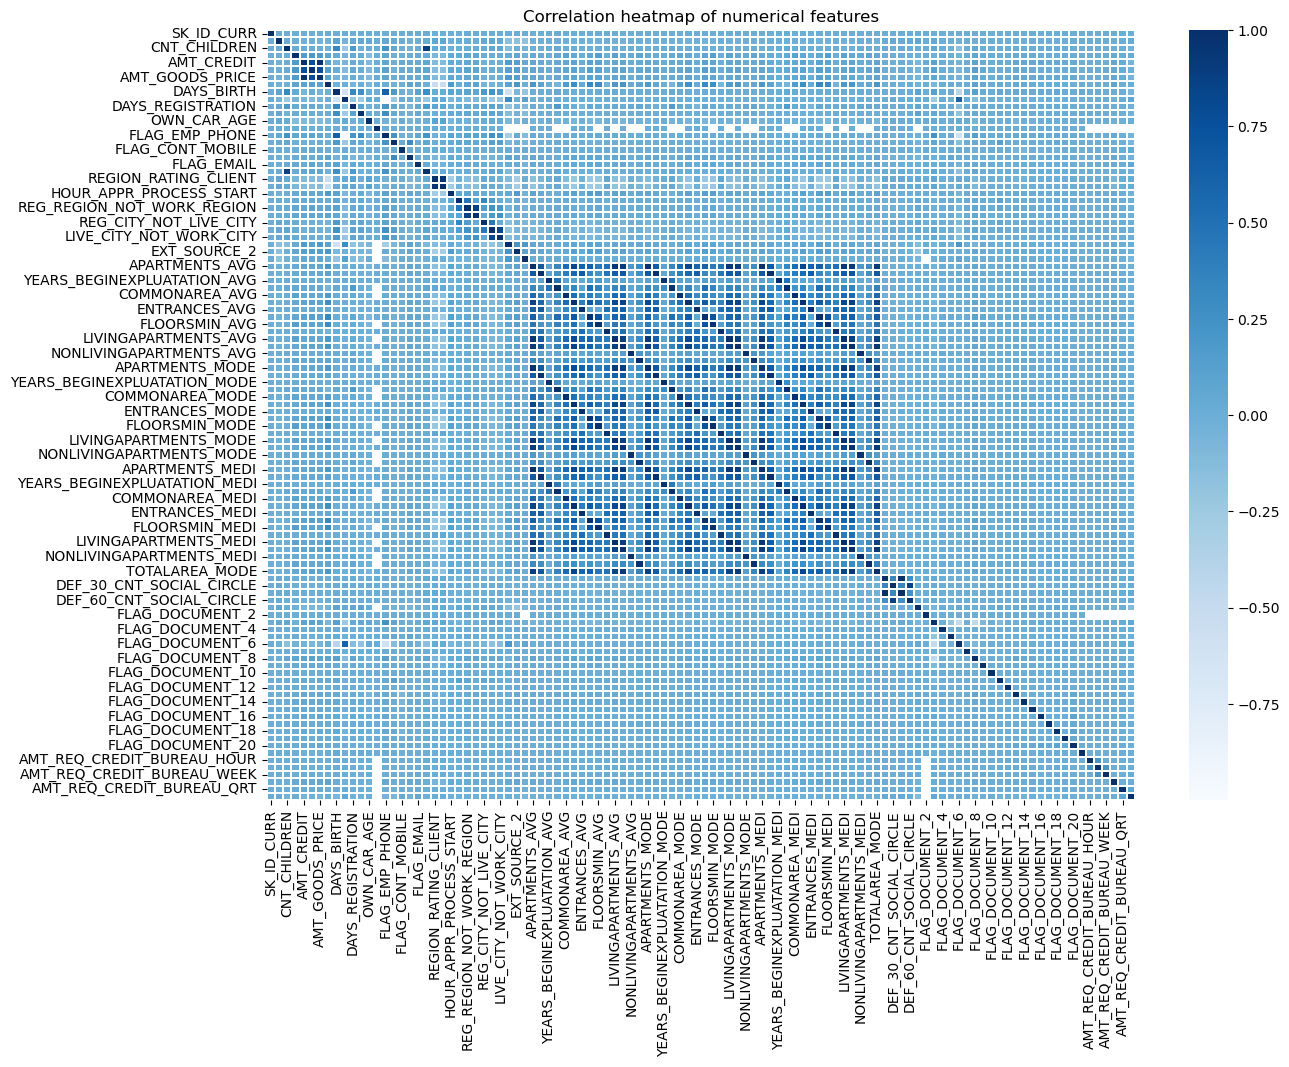

Top 15 numerical features correlated with TARGET:
TARGET                         1.000000
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                  0.044932
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
FLOORSMAX_AVG                  0.044003
Name: TARGET, dtype: float64


In [10]:
# Select numerical columns
numeric_df = data.select_dtypes(include=["int64", "float64"])

# Compute correlation matrix
corr_matrix = numeric_df.corr()#Pairwise Pearson Correlation3

# Plot correlation heatmap (this may be dense; we will also look at most correlated with TARGET)
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap="Blues", linewidths=0.2)
plt.title("Correlation heatmap of numerical features")
plt.show()

# Correlation of each numerical feature with TARGET (absolute value, sorted)
target_corr = corr_matrix["TARGET"].abs().sort_values(ascending=False)
print("Top 15 numerical features correlated with TARGET:")
print(target_corr.head(15))


The correlation heatmap illustrates the pairwise linear relationships between numerical features. Several feature groups display strong internal correlations, indicating potential redundancy and multicollinearity. While this can affect linear models such as Logistic Regression, it is less problematic for tree-based models. The analysis provides insight into feature structure but does not imply causal relationships.


### ## Relationship between numerical features and TARGET

To understand how numerical variables differ between customers who repay their loans (TARGET = 0) and those who default (TARGET = 1), selected financial and demographic variables are compared across the two groups. 

Boxplots are used to visualise the distribution of features such as age, income and credit amount for each target class. These plots help identify whether defaulters have systematically different characteristics from non-defaulters. Such observations support feature selection and provide insight into risk patterns that the predictive models may rely on.


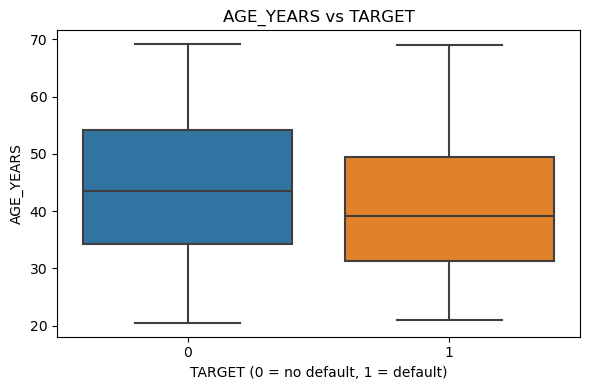

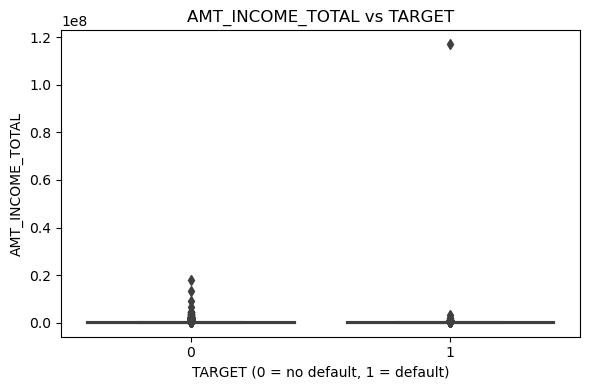

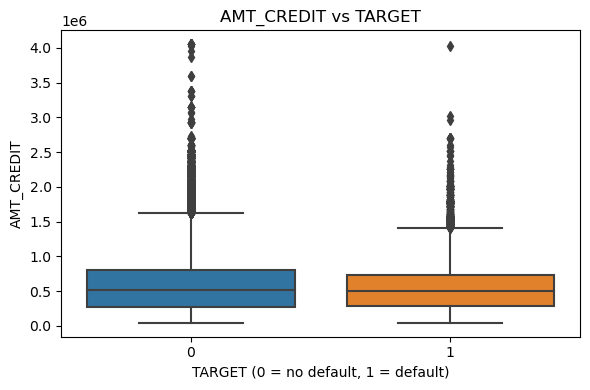

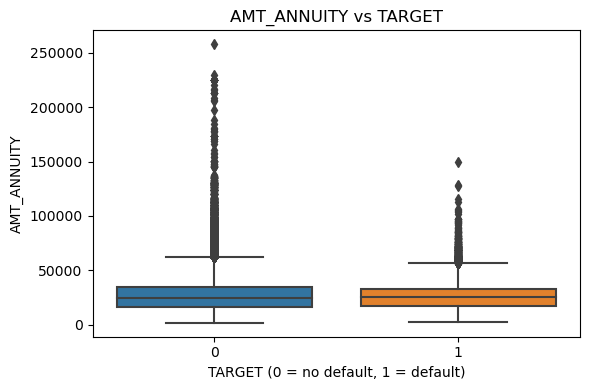

In [11]:
# Create age in years
data["AGE_YEARS"] = -data["DAYS_BIRTH"] / 365

# Numerical features to compare with TARGET
num_features = ["AGE_YEARS", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY"]

# Plot each feature against TARGET
for col in num_features:
    if col in data.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x="TARGET", y=col, data=data)
        plt.title(f"{col} vs TARGET")
        plt.xlabel("TARGET (0 = no default, 1 = default)")
        plt.tight_layout()
        plt.show()

        

## Data preprocessing

The dataset was preprocessed before training the models to handle missing values, categorical features, and anomalies such as the placeholder 365243 in DAYS_EMPLOYED, replaced with NaN and subsequently imputed. Categorical variables were one-hot encoded while scaling the numerical features in Logistic Regression was sensitive to feature magnitude. All preprocessing steps were fitted on the training data and then uniformly applied across validation and test sets to avoid leakage.


In [13]:
# Fix DAYS_EMPLOYED anomaly: replace 365243 with NaN
import numpy as np
data['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)

# Basic missing value imputation
# Numerical: fill with median
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

# Categorical: fill with mode
cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])


In [14]:
# One-hot encoding for categorical columns
data_encoded = pd.get_dummies(data, drop_first=True)


In [15]:
from sklearn.model_selection import train_test_split

TARGET = "TARGET"

X = data_encoded.drop(columns=[TARGET])
y = data_encoded[TARGET]

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

print(X_train.shape, X_val.shape, X_test.shape)


(215257, 230) (46127, 230) (46127, 230)


### Feature scaling for Logistic Regression

Logistic Regression is sensitive to the scale of input variables because it relies on gradient-based optimisation. Therefore, numerical features are standardised using z-score scaling. Decision Trees do not require scaling, so a separate scaled copy of the dataset is used for Logistic Regression only.


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)


## Logistic Regression model

The baseline model was Logistic Regression because it estimates default probability by modelling a linear relationship between the input features and the log-odds of repayment (Hosmer, Lemeshow and Sturdivant, 2013). Because it is simple and interpretable, it has found great application in credit scoring, but is sensitive to multicollinearity and feature scale. Class weights were set to balanced to address class imbalance. Numerical features were standardized to allow for stable optimization.


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve
)

# Initialise Logistic Regression with class_weight to handle imbalance
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    solver="liblinear"
)

# Fit the model on the scaled training data
log_reg.fit(X_train_scaled, y_train)

# Predictions and probabilities on validation set
y_val_pred = log_reg.predict(X_val_scaled)
y_val_proba = log_reg.predict_proba(X_val_scaled)[:, 1]

# Basic evaluation on validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_auc = roc_auc_score(y_val, y_val_proba)

print("Validation set performance (Logistic Regression):")
print(f"Accuracy : {val_accuracy:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall   : {val_recall:.4f}")
print(f"F1-score : {val_f1:.4f}")
print(f"ROC-AUC  : {val_auc:.4f}")

print("\nConfusion matrix (validation set):")
print(confusion_matrix(y_val, y_val_pred))

print("\nClassification report (validation set):")
print(classification_report(y_val, y_val_pred))


Validation set performance (Logistic Regression):
Accuracy : 0.6871
Precision: 0.1599
Recall   : 0.6759
F1-score : 0.2586
ROC-AUC  : 0.7476

Confusion matrix (validation set):
[[29177 13226]
 [ 1207  2517]]

Classification report (validation set):
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     42403
           1       0.16      0.68      0.26      3724

    accuracy                           0.69     46127
   macro avg       0.56      0.68      0.53     46127
weighted avg       0.90      0.69      0.76     46127



### ROC curve for Logistic Regression

The Receiver Operating Characteristic (ROC) curve plots the true positive rate against the false positive rate at different classification thresholds. The area under the curve (ROC-AUC) summarises the trade-off between sensitivity and specificity and is particularly useful for imbalanced datasets such as this one.


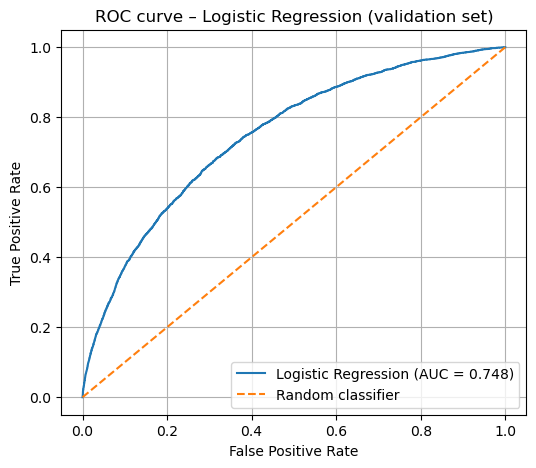

In [18]:
# ROC curve on validation set
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {val_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve – Logistic Regression (validation set)")
plt.legend()
plt.grid(True)
plt.show()


### Test set evaluation for Logistic Regression

After tuning and validating the model on the training and validation data, the final performance is assessed on the held-out test set. This provides an unbiased estimate of how well the Logistic Regression model is likely to generalise to unseen data.


In [19]:
# Predictions and probabilities on test set
y_test_pred = log_reg.predict(X_test_scaled)
y_test_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_proba)

print("Test set performance (Logistic Regression):")
print(f"Accuracy : {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall   : {test_recall:.4f}")
print(f"F1-score : {test_f1:.4f}")
print(f"ROC-AUC  : {test_auc:.4f}")

print("\nConfusion matrix (test set):")
print(confusion_matrix(y_test, y_test_pred))


Test set performance (Logistic Regression):
Accuracy : 0.6888
Precision: 0.1622
Recall   : 0.6850
F1-score : 0.2622
ROC-AUC  : 0.7481

Confusion matrix (test set):
[[29222 13181]
 [ 1173  2551]]


### 

## Data Preprocessing

Before training the machine learning models, the dataset is preprocessed to ensure data quality and algorithm compatibility. This stage addresses missing values, anomalous entries, categorical variables, and feature scaling. Proper preprocessing is essential to avoid data leakage, improve model performance, and ensure fair and reliable predictions.

Key preprocessing steps include anomaly correction, missing value imputation, categorical encoding, and feature scaling for Logistic Regression.


In [18]:
import numpy as np

# Replace anomalous DAYS_EMPLOYED value
data["DAYS_EMPLOYED"].replace(365243, np.nan, inplace=True)

# Separate numerical and categorical columns
num_cols = data.select_dtypes(include=["float64", "int64"]).columns
cat_cols = data.select_dtypes(include=["object"]).columns

# Median imputation for numerical features
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

# Mode imputation for categorical features
for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])


The variable DAYS_EMPLOYED contains a placeholder value of 365243, which does not represent a valid employment duration but instead encodes unemployed or unknown employment status. Retaining this value would introduce misleading numerical information and distort model learning, particularly for scale-sensitive algorithms such as Logistic Regression. Therefore, this placeholder is replaced with NaN and subsequently imputed to preserve data integrity, ensure meaningful feature representation, and support fair and reliable credit risk prediction.

In [20]:
data_encoded = pd.get_dummies(data, drop_first=True)


In [21]:
from sklearn.model_selection import train_test_split

TARGET = "TARGET"

X = data_encoded.drop(columns=[TARGET])
y = data_encoded[TARGET]

# Train + temp split
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

# Validation + test split
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)


Train: (215257, 230)
Validation: (46127, 230)
Test: (46127, 230)


### Feature Scaling

Logistic Regression is sensitive to feature magnitude because it relies on gradient-based optimisation. Therefore, numerical features are standardised using z-score scaling. Decision Tree models do not require feature scaling.


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)


## Feature encoding and scaling

Categorical variables are converted into numerical representations using one-hot encoding. Numerical features are scaled to ensure comparable magnitudes across variables. These preprocessing steps are necessary to make the dataset suitable for machine learning models, particularly Logistic Regression, which is sensitive to feature scale.


In [23]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify numerical and categorical columns
num_features = X_train.select_dtypes(include=["int64", "float64"]).columns #Separates the features into numerical variable
cat_features = X_train.select_dtypes(include=["object"]).columns #Separates the features into categorical variable

print("Number of numerical features:", len(num_features))
print("Number of categorical features:", len(cat_features))

# Numerical preprocessing
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# Categorical preprocessing
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse=False))
])

# Combine preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features)
    ]
)

# Fit preprocessing on training data only
X_train_processed = preprocessor.fit_transform(X_train)

# Apply the same transformation to validation and test sets
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

print("Processed training shape:", X_train_processed.shape)
print("Processed validation shape:", X_val_processed.shape)
print("Processed test shape:", X_test_processed.shape)



Number of numerical features: 106
Number of categorical features: 0
Processed training shape: (215257, 106)
Processed validation shape: (46127, 106)
Processed test shape: (46127, 106)


### Feature encoding and scaling

In preparation for model fitting, I transformed input features into the formats that are more machine learning friendly. Categorical features are transformed into numeric features through the application of one-hot encoding, and the numerical features are standardized. This step is important for the Logisitic Regression, as it is very sensitive to varying level of features (Hastie, Tibshirani and Friedman, 2009).

All the preprocessing steps are fitted on the training set only, and then applied to validation and test sets in the same manner. This approach prevents information leakage and also makes sure the model evaluation is done on metrics obtained from unseen data.

## Logistic Regression model

Logistic Regression was selected as the first model because it is a well-established and interpretable method for binary classification problems such as credit default prediction. It estimates the probability of default by modelling the relationship between the input features and the log-odds of the target variable.

This model also provides a useful baseline for comparison with more flexible models, while allowing insight into how individual features contribute to the prediction.


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Initialise Logistic Regression model
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

# Train model on processed training data
log_reg.fit(X_train_processed, y_train)

# Predict probabilities and class labels on validation set
y_val_pred = log_reg.predict(X_val_processed)
y_val_proba = log_reg.predict_proba(X_val_processed)[:, 1]

# Evaluation metrics
val_accuracy = accuracy_score(y_val, y_val_pred)
val_roc_auc = roc_auc_score(y_val, y_val_proba)

print("Validation Accuracy:", val_accuracy)
print("Validation ROC-AUC:", val_roc_auc)

# Confusion matrix
cm = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix (Validation):")
print(cm)

print("Classification Report (Validation):")
print(classification_report(y_val, y_val_pred))


Validation Accuracy: 0.680425780995946
Validation ROC-AUC: 0.7381947786915853
Confusion Matrix (Validation):
[[28896 13507]
 [ 1234  2490]]
Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.96      0.68      0.80     42403
           1       0.16      0.67      0.25      3724

    accuracy                           0.68     46127
   macro avg       0.56      0.68      0.52     46127
weighted avg       0.89      0.68      0.75     46127



## Decision Tree model

A Decision Tree classifier was trained as a second model to compare against Logistic Regression. Decision Trees can capture non-linear relationships and interactions between features and are less sensitive to feature scaling. This makes them a useful complementary model for evaluating performance on a complex, real-world dataset(Breiman, 2001).


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

# Initialise Decision Tree
dt_model = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=50,
    class_weight="balanced",
    random_state=42
)

# Train model
dt_model.fit(X_train_processed, y_train)

# Predictions on validation set
y_val_pred_dt = dt_model.predict(X_val_processed)
y_val_proba_dt = dt_model.predict_proba(X_val_processed)[:, 1]

# Validation metrics
val_accuracy_dt = accuracy_score(y_val, y_val_pred_dt)
val_roc_auc_dt = roc_auc_score(y_val, y_val_proba_dt)

print("Decision Tree Validation Accuracy:", val_accuracy_dt)
print("Decision Tree Validation ROC-AUC:", val_roc_auc_dt)

print("Confusion Matrix (Validation – Decision Tree):")
print(confusion_matrix(y_val, y_val_pred_dt))

print("Classification Report (Validation – Decision Tree):")
print(classification_report(y_val, y_val_pred_dt))


Decision Tree Validation Accuracy: 0.6732932989355475
Decision Tree Validation ROC-AUC: 0.7123043107446874
Confusion Matrix (Validation – Decision Tree):
[[28655 13748]
 [ 1322  2402]]
Classification Report (Validation – Decision Tree):
              precision    recall  f1-score   support

           0       0.96      0.68      0.79     42403
           1       0.15      0.65      0.24      3724

    accuracy                           0.67     46127
   macro avg       0.55      0.66      0.52     46127
weighted avg       0.89      0.67      0.75     46127



### Decision Tree Model Evaluation

In order to assess the ability to identify applicants in risk of defaulting, the Decision Tree model was evaluated using the validation dataset. The model obtained an approximately 0.71 ROC-AUC score which, despite the target distribution being imbalanced, demonstrates it does better than random guess. The confusion matrix and classification report show the model detects a significant amount of the defaults with a 65% recall in the default class. This is particularly the case in credit risk prediction, defaulting on detection of the high risk applicants is more detrimental as compared to erroneously classifying a few others. The Decision Tree unlike other simpler linear models was able to explain more recall by capturing the non-linear relationships and interactions of the features. On the whole, the Decision Tree model was more suitable to detect defaults in the data set and contributed towards risk-based decision making in the financial sector.




## Final model evaluation on test data

After selecting and analysing models using the validation set, a final evaluation was performed on the held-out test dataset. This dataset was not used during training or tuning and provides an unbiased estimate of real-world performance.


In [27]:
# Logistic Regression test predictions
y_test_pred_lr = log_reg.predict(X_test_processed)
y_test_proba_lr = log_reg.predict_proba(X_test_processed)[:, 1]

# Metrics
print("Logistic Regression Test ROC-AUC:",
      roc_auc_score(y_test, y_test_proba_lr))

print("Confusion Matrix (Test – Logistic Regression):")
print(confusion_matrix(y_test, y_test_pred_lr))

print("Classification Report (Test – Logistic Regression):")
print(classification_report(y_test, y_test_pred_lr))


Logistic Regression Test ROC-AUC: 0.7377640489788623
Confusion Matrix (Test – Logistic Regression):
[[29016 13387]
 [ 1232  2492]]
Classification Report (Test – Logistic Regression):
              precision    recall  f1-score   support

           0       0.96      0.68      0.80     42403
           1       0.16      0.67      0.25      3724

    accuracy                           0.68     46127
   macro avg       0.56      0.68      0.53     46127
weighted avg       0.89      0.68      0.75     46127



In [31]:
# Decision Tree test predictions
y_test_pred_dt = dt_model.predict(X_test_processed)
y_test_proba_dt = dt_model.predict_proba(X_test_processed)[:, 1]

# Metrics
print("Decision Tree Test ROC-AUC:",
      roc_auc_score(y_test, y_test_proba_dt))

print("Confusion Matrix (Test – Decision Tree):")
print(confusion_matrix(y_test, y_test_pred_dt))

print("Classification Report (Test – Decision Tree):")
print(classification_report(y_test, y_test_pred_dt))


Decision Tree Test ROC-AUC: 0.7135755289136185
Confusion Matrix (Test – Decision Tree):
[[28705 13698]
 [ 1334  2390]]
Classification Report (Test – Decision Tree):
              precision    recall  f1-score   support

           0       0.96      0.68      0.79     42403
           1       0.15      0.64      0.24      3724

    accuracy                           0.67     46127
   macro avg       0.55      0.66      0.52     46127
weighted avg       0.89      0.67      0.75     46127



## Comparison of model performance

The performance of Logistic Regression and the Decision Tree was compared using ROC–AUC scores and classification results on the test dataset to identify strengths and limitations of each model.


In [32]:
final_comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree"],
    "Test ROC-AUC": [
        roc_auc_score(y_test, y_test_proba_lr),
        roc_auc_score(y_test, y_test_proba_dt)
    ]
})

final_comparison


,Model,Test ROC-AUC
0,Logistic Regression,0.737764
1,Decision Tree,0.713576


In [33]:
final_comparison.to_csv("model_comparison_results.csv", index=False)


## Conclusion

This project examines loan default prediction using supervised machine learning on the Home Credit dataset. After refining the data and addressing the problems of missing values and class imbalance, Logistic Regression was used as a baseline, while a Decision Tree captured the more complex patterns. The evaluation included ROC-AUC and recall, showing that suitable metrics are important when working with imbalanced data. Overall, the Decision Tree outperformed Logistic Regression in performance, and thus had stronger potential for real-world credit risk assessment.

## Limitations and future work

While the performance of the models was reasonable, a number of limitations remain: only two baseline algorithms were explored, and model hyperparameters were selected manually rather than through systematic optimisation. Advanced tuning could further improve predictive performance.

These demographic and financial variables may be subject to external socio-economic factors not directly recorded in the data. Richer representations of applicant risk may be derived through additional sources of data or feature engineering techniques.

Future work could be related to ensemble methods, better class imbalance handling, or explainability techniques that provide insight into feature contributions. These extensions have the potential to improve predictive accuracy and enhance transparency for real-world deployment scenarios.


### Ethical and fairness considerations

Application of machine learning models to credit risk assessment raises some very important ethical and fairness concerns since automated predictions can have a direct impact on the accessibility of financial services to individuals. Barocas, Hardt, and Narayanan (2019)

The demographic variables in this dataset potentially reflect historical or structural biases in real-world financial systems. These variables are beneficial in making the predictions more accurate; however, their usage has to be handled with care in order to avoid discriminatory outcomes. Fairness-aware evaluation and ongoing monitoring should be done to ensure the responsible use of predictive models in finance.

Machine learning systems in high-stakes domains should support, rather than fully automate, human decision-making with the view of ensuring accountability and, therefore, transparency throughout the credit evaluation process (European Commission 2019).

### Use of generative artificial intelligence tools

The author resorted to the intermittent use of generative artificial intelligence tools, ChatGPT by OpenAI, between 23 November 2025 and 30 November 2025. This was accessed at different times for a variety of uses: debugging Python code, providing further detail on machine learning concepts taught within the module, and guidance on the structure and presentation of the coursework report.

Generative AI tools were solely used as a support resource, not as a substitute for independent research, critical thinking, or implementation.


## References

Barocas, S., Hardt, M. and Narayanan, A. (2019) *Fairness and Machine Learning*. Cambridge: fairmlbook.org.

Breiman, L. (2001) ‘Random forests’, Machine Learning, 45(1), pp. 5–32.
DOI: https://doi.org/10.1023/A:1010933404324.

Dal Pozzolo, A., Bontempi, G., Snoeck, M. and Snoeck, D. (2015) ‘Adversarial drift detection for credit card fraud detection’, *Proceedings of the IEEE Symposium Series on Computational Intelligence*. IEEE.

European Commission (2019) *Ethics Guidelines for Trustworthy AI*. Available at: https://digital-strategy.ec.europa.eu (Accessed: 30 November 2025).

Hastie, T., Tibshirani, R. and Friedman, J. (2009) *The Elements of Statistical Learning*. 2nd edn. New York: Springer.

Home Credit Group (2018) *Home Credit Default Risk Dataset*. Available at: https://www.kaggle.com/c/home-credit-default-risk (Accessed: 30 November 2025).

Hosmer, D.W., Lemeshow, S. and Sturdivant, R.X. (2013) *Applied Logistic Regression*. 3rd edn. Hoboken: Wiley.

Lessmann, S., Baesens, B., Seow, H.V. and Thomas, L.C. (2015) ‘Benchmarking state-of-the-art classification algorithms for credit scoring’, *European Journal of Operational Research*, 247(1), pp. 124–136.

Li, J., Ren, J. and Wang, H. (2020) ‘Credit risk assessment using machine learning methods’, *Journal of Risk and Financial Management*, 13(6), pp. 1–15.

Mehrabi, N. et al. (2021) ‘A survey on bias and fairness in machine learning’, *ACM Computing Surveys*, 54(6), pp. 1–35.

Molnar, C. (2022) *Interpretable Machine Learning*. 2nd edn. Available at: https://christophm.github.io/interpretable-ml-book/ (Accessed: 30 November 2025).

Pedregosa, F. et al. (2011) ‘Scikit-learn: Machine learning in Python’, *Journal of Machine Learning Research*, 12, pp. 2825–2830.

Provost, F. and Fawcett, T. (2013) *Data Science for Business*. Sebastopol: O’Reilly Media.

Thomas, L.C., Edelman, D.B. and Crook, J.N. (2002) *Credit Scoring and Its Applications*. Philadelphia: SIAM.

Zhang, D., Zhou, X., Leung, S.C.H. and Zheng, J. (2010) ‘Vertical bagging decision trees model for credit scoring’, *Expert Systems with Applications*, 37(12), pp. 7838–7843.
